In [1]:
import pickle
import sinn
from sinn.histories import *
import sinn.analyze as anlz

[monochrome_palette]: value was greater than 1 and was clipped.


In [2]:
A = Series(name='A', time_array=np.linspace(0, 10, 1001), shape=(2,2))

In [3]:
A._compute_up_to(4)

RuntimeError: The update function for history A is not set.

In [3]:
A.repr_np

{'version': array(3.),
 'type': array('Series', dtype='<U6'),
 'name': array('A', dtype='<U1'),
 't0': array(0.),
 'tn': array(10.),
 'dt': array(0.01),
 'dt64': array(0.01),
 't0idx': array(0, dtype=int16),
 'idx_dtype': array(dtype('uint8'), dtype=object),
 'tidx_dtype': array(dtype('int16'), dtype=object),
 '_unpadded_length': array(1001),
 'shape': array([2, 2]),
 'ndim': array(2),
 '_tarr': array([ 0.  ,  0.01,  0.02, ...,  9.98,  9.99, 10.  ]),
 '_sym_tidx': array(-1, dtype=int16),
 '_data': array([], shape=(0, 2, 2), dtype=float64),
 '_iterative': array(True),
 'locked': array(False),
 'symbolic': array(False)}

In [4]:
B = Series.from_repr_np(A.repr_np)

You are locking the empty history A. Trying to evaluate it at any point will trigger an error.


In [5]:
ω = np.array([[1, .5], [3, np.pi]])
def A_upd(ti):
    if len(np.atleast_1d(ti)) > 1:
        ti = np.atleast_1d(ti).reshape((-1,) + (1,)*A.ndim)
    return np.sin(ω*A._tarr[ti])
A.set_update_function(A_upd, inputs=[])

In [6]:
A._compute_up_to(300)

In [7]:
B = Series.from_repr_np(A.repr_np)

You are locking the unfilled history A. Trying to evaluate it beyond 3.0 will trigger an error.


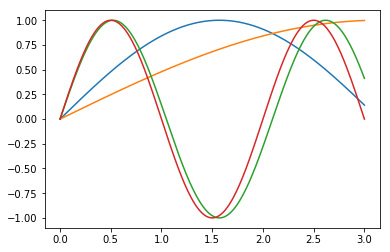

In [8]:
anlz.plot(A);

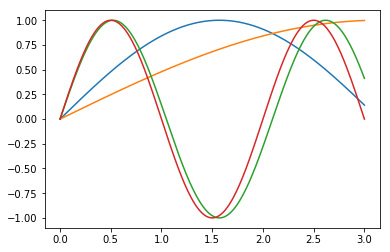

In [9]:
anlz.plot(B);

In [24]:
A.repr_np['_data'].shape

(301, 2, 2)

In [10]:
B._update_function

<bound method History._update_function of A (t0: 0.0, tn: 10.0)>

In [11]:
B.unlock()

In [12]:
B._compute_up_to(B.tnidx)

AttributeError: 'Series' object has no attribute 'input_list'

In [13]:
with open('test-save', 'bw') as f:
    pickle.dump(A, f)

In [14]:
with open('test-save', 'br') as f:
    B2 = pickle.load(f)

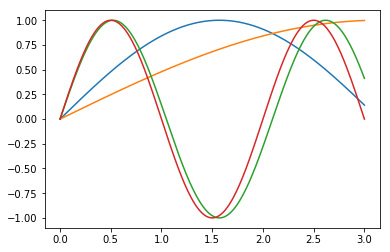

In [15]:
anlz.plot(B2);

In [16]:
B2.locked

False

In [17]:
B2._compute_up_to('end')

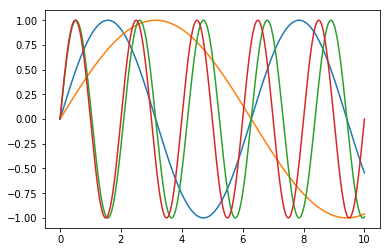

In [19]:
anlz.plot(B2);

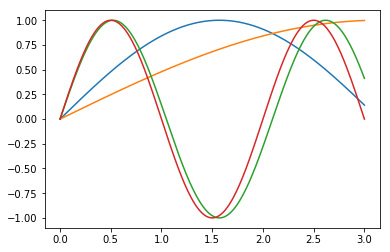

In [21]:
anlz.plot(A);